## Reference

Module 2: Introduction to TensorFlow - https://colab.research.google.com/drive/1F_EWVKa8rbMXi3_fG0w7AtcscFq7Hi7B#forceEdit=true&sandboxMode=true
<br>📗 Module 3: Core Learning Algorithms - https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true
<br>📘 Module 4: Neural Networks with TensorFlow -   
https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true
<br>📙 Module 5: Deep Computer Vision - https://colab.research.google.com/drive/1ZZXnCjFEOkp_KdNcNabd14yok0BAIuwS#forceEdit=true&sandboxMode=true
<br>📔 Module 6: Natural Language Processing with RNNs -  https://colab.research.google.com/drive/1ysEKrw_LE2jMndo1snrZUh5w87LQsCxk#forceEdit=true&sandboxMode=true
<br>📒 Module 7: Reinforcement Learning - https://colab.research.google.com/drive/1IlrlS3bB8t1Gd5Pogol4MIwUxlAjhWOQ#forceEdit=true&sandboxMode=true


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

In [2]:
df_train=pd.read_csv('../input/titanic-dataset-from-kaggle/train.csv')
df_test=pd.read_csv('../input/titanic-dataset-from-kaggle/test.csv')

In [3]:
remove_cols=['PassengerId',  'Name', 'Ticket', 'Cabin',]

In [4]:
y_train=df_train['Survived']
X_train=df_train.drop(remove_cols+['Survived'],axis=1)
X_test=df_test.drop(remove_cols,axis=1)

In [5]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

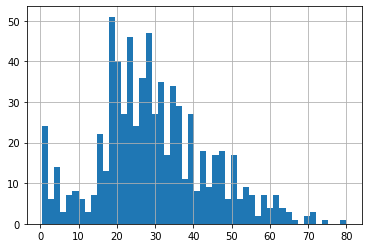

In [6]:
X_train.Age.hist(bins=50)

In [7]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [9]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
X_train['Embarked']=imp.fit_transform(X_train[['Embarked']])


In [11]:
imp=SimpleImputer(strategy='mean')
X_train['Age']=imp.fit_transform(X_train[['Age']])

In [12]:
X_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [13]:
X_test['Age']=imp.fit_transform(X_test[['Age']])

fare_imp=SimpleImputer(strategy='mean')
fare_imp.fit(X_train[['Fare']])
X_test['Fare']=fare_imp.transform(X_test[['Fare']])

In [14]:
#X_train.Age = X_train.Age.astype(int) 

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,shuffle=True)

In [16]:
num_cols=['Age','Fare']
cat_cols=[i for i in X_train.columns if i not in num_cols]
print('cat_cols = ',cat_cols)

cat_cols =  ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [17]:
feature_cols=[]
for cat_col_name in cat_cols:
    vocabulary=X_train[cat_col_name].unique()
    feature_cols.append(tf.feature_column.categorical_column_with_vocabulary_list(cat_col_name,vocabulary))
    
for num_col_name in num_cols:
    feature_cols.append(tf.feature_column.numeric_column(num_col_name,dtype=tf.float32))
    
print(feature_cols)

[VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(3, 1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('female', 'male'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='SibSp', vocabulary_list=(1, 0, 4, 2, 3, 8, 5), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(4, 1, 0, 2, 5, 6, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [18]:
#Loading dataset

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():  # inner function, this will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
        if shuffle:
            ds = ds.shuffle(1000)  # randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
        return ds  # return a batch of the dataset
    return input_function  # return a function object for use

train_input_fn = make_input_fn(X_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(X_val, y_val, num_epochs=1, shuffle=False)
#test_input_fn = make_input_fn(X_val, num_epochs=1, shuffle=False)


In [19]:
#Reuslt changes every time due to shuffle and you can also adjust it with epochs
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_cols)
linear_est.train(train_input_fn)
result=linear_est.evaluate(eval_input_fn)


/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
2022-09-02 06:22:32.875640: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
result

{'accuracy': 0.8324022,
 'accuracy_baseline': 0.6424581,
 'auc': 0.89599186,
 'auc_precision_recall': 0.8700402,
 'average_loss': 0.38340682,
 'label/mean': 0.3575419,
 'loss': 0.39663112,
 'precision': 0.84,
 'prediction/mean': 0.34956977,
 'recall': 0.65625,
 'global_step': 230}

In [21]:
res=list(linear_est.predict(eval_input_fn))
print(res[:5])

[{'logits': array([-1.3639282], dtype=float32), 'logistic': array([0.20360258], dtype=float32), 'probabilities': array([0.7963974 , 0.20360261], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-2.5893898], dtype=float32), 'logistic': array([0.06982437], dtype=float32), 'probabilities': array([0.9301756 , 0.06982441], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-2.1246893], dtype=float32), 'logistic': array([0.10672021], dtype=float32), 'probabilities': array([0.89327973, 0.10672019], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.6178284], dtype

In [22]:
print(X_val.iloc[5])
print('Survived =1 , Dead=0 :: ',y_val.iloc[5])
print(res[5]['probabilities'])

Pclass           1
Sex         female
Age           22.0
SibSp            0
Parch            2
Fare          49.5
Embarked         C
Name: 539, dtype: object
Survived =1 , Dead=0 ::  1
[0.09655212 0.9034479 ]


# Classification

### Dataset <br>
This specific dataset seperates flowers into 3 different classes of species.
- Setosa
- Versicolor
- Virginica

The information about each flower is the following.
- sepal length
- sepal width
- petal length
- petal width

In [23]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [24]:
# Get dataset 
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [25]:
train

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [26]:
train_y=train.pop('Species')
test_y=test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [27]:
train.shape

(120, 4)

In [28]:
#Input function (different from previous), this does not have epochs

def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


In [29]:
#creating feature cols for tensorflow
my_feature_cols=[]
for col in train.columns:
    my_feature_cols.append(tf.feature_column.numeric_column(col))

print(my_feature_cols)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [30]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each. DNN=Deep Neural Network
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_cols,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

2022-09-02 06:22:40.151208: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
classifier.train(
    input_fn= lambda: input_fn(train,train_y,training=True),steps=5000
)

In [32]:
result=classifier.evaluate( input_fn= lambda: input_fn(test,test_y,training=False))

In [33]:
result

{'accuracy': 0.93333334,
 'average_loss': 0.37792248,
 'loss': 0.37792248,
 'global_step': 5000}

### Predictions
Now that we have a trained model it's time to use it to make predictions. I've written a little script below that allows you to type the features of a flower and see a prediction for its class.

In [34]:

def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}
'''
print("Please type numeric values as prompted.")
for feature in features:
    valid = True
    while valid: 
        val = input(feature + ": ")
        if not val.isdigit(): valid = False

    predict[feature] = [float(val)]
'''
predictions = list(classifier.predict(input_fn=lambda: input_fn(test)))

'''
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))
'''


'\nfor pred_dict in predictions:\n    class_id = pred_dict[\'class_ids\'][0]\n    probability = pred_dict[\'probabilities\'][class_id]\n\n    print(\'Prediction is "{}" ({:.1f}%)\'.format(\n        SPECIES[class_id], 100 * probability))\n'

In [35]:
predictions[4],test_y[4]

({'logits': array([-0.5229342,  1.9144566,  1.6516744], dtype=float32),
  'probabilities': array([0.0470768 , 0.53870666, 0.41421658], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1, 2], dtype=int32),
  'all_classes': array([b'0', b'1', b'2'], dtype=object)},
 1)

# Clustering

## Clustering
Now that we've covered regression and classification it's time to talk about clustering data! 

Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. (https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

Unfortunalty there are issues with the current version of TensorFlow and the implementation for KMeans. This means we cannot use KMeans without writing the algorithm from scratch. We aren't quite at that level yet, so we'll just explain the basics of clustering for now.

#### Basic Algorithm for K-Means.
- Step 1: Randomly pick K points to place K centroids
- Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
- Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step 4: Reassign every point once again to the closest centroid.
- Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

*Please refer to the video for an explanation of KMeans clustering.*

## Hidden Markov Models

"The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution []. Transitions among the states are governed by a set of probabilities called transition probabilities." (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

A hidden markov model works with probabilities to predict future events or states. In this section we will learn how to create a hidden markov model that can predict the weather.

*This section is based on the following TensorFlow tutorial.* https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

### Data
Let's start by discussing the type of data we use when we work with a hidden markov model. 

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states. 

We can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up, but let's discuss the components of a markov model.

**States:** In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

**Observations:** Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: *On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.*

**Transitions:** Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: *a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.*

To create a hidden markov model we need.
- States
- Observation Distribution
- Transition Distribution

For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.

### Weather Model
Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel). 

We will model a simple weather system and try to predict the temperature on each day given the following information.
1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is
 normally distributed with mean and standard deviation 0 and 5 on
 a cold day and mean and standard deviation 15 and 10 on a hot day.

If you're unfamiliar with **standard deviation** it can be put simply as the range of expected values. 

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

To model this in TensorFlow we will do the following.


In [36]:
import tensorflow_probability as tfp
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.8, 0.2])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

In [37]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the **expected temperatures** on each day we can do the following.

In [38]:
model.mean()

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([2.9999998, 5.9999995, 7.4999995, 8.25     , 8.625001 , 8.812501 ,
       8.90625  ], dtype=float32)>

In [39]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:  
    print(mean.numpy())

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
